In [1]:
#import libraries

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from joblib import Parallel, delayed
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from multiprocessing import Pool
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from joblib import parallel_backend
from scipy.cluster.hierarchy import dendrogram , fcluster
from fastcluster import linkage
import fastcluster
from scipy.cluster.hierarchy import to_tree, optimal_leaf_ordering
import seaborn as sns
import scipy.cluster.hierarchy as sch
from matplotlib import cm
import plotly.figure_factory as ff
from scipy.spatial import ConvexHull
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
import glob
import pandas as pd

# set paths to folders containing CSV files
path1 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_po1.csv"
path2 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_pdmp1.csv"
path3 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_pin1.csv"

all_files = [path1, path2, path3]
dfs = []

for filename in all_files:
    with open(filename, 'r') as f:
        csv_string = f.read()

    data = csv_string
    df = pd.DataFrame([x.split(',') for x in data.split('\n')])
    df.drop(df.tail(1).index,inplace=True)
    dfs.append(df)

df_combined1, df_combined2, df_combined3 = dfs[0], dfs[1], dfs[2]

# process dataframe 1
df1 = df_combined1.rename(columns={0: 'Fault'})
df1 = df1.astype(float)

mincol1 = df1.count(axis=1)
min_elements1 = mincol1.min()
df1 = df1.iloc[:, :min_elements1]

# process dataframe 2
df2 = df_combined2.rename(columns={0: 'Fault'})
df2 = df2.astype(float)

mincol2 = df2.count(axis=1)
min_elements2 = mincol2.min()
df2 = df2.iloc[:, :min_elements2]

# process dataframe 3
df3 = df_combined3.rename(columns={0: 'Fault'})
df3 = df3.astype(float)

mincol3 = df3.count(axis=1)
min_elements3 = mincol3.min()
df3 = df3.iloc[:, :min_elements3]

In [3]:
# # import file and cut dataset at min columns

# import glob

# # set path to folder containing CSV files
# path = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_pin1.csv"

# all_files = glob.glob(path)

# dfs = []

# for filename in all_files:
#     with open(filename, 'r') as f:
#         csv_string = f.read()

#     data = csv_string
#     df = pd.DataFrame([x.split(',') for x in data.split('\n')])
#     df.drop(df.tail(1).index,inplace=True)
#     dfs.append(df)

# df_combined = pd.concat(dfs, ignore_index=True)
# df_combined
# df = df_combined

# df = df.rename(columns={0: 'Fault'})
# df = df.astype(float)

# mincol = df.count(axis=1)
# min_elements = mincol.min()
# min_elements
# df = df.iloc[:, :min_elements]
# df

In [4]:
# consider only 1000 rows

df1 = df1[:1000]
df2 = df2[:1000]
df3 = df3[:1000]


In [5]:
# Assign Fault label to new df y_true

y_true1 = df1["Fault"]
y_true2 = df2["Fault"]
y_true3 = df3["Fault"]

In [6]:
# del fault label column 

df1.columns = df1.columns.astype(str)
del df1[df1.columns[0]]

df2.columns = df2.columns.astype(str)
del df2[df2.columns[0]]

df3.columns = df3.columns.astype(str)
del df3[df3.columns[0]]

In [7]:
# Perform PCA on the data

pca1 = PCA(n_components=2)
principal_components1 = pca1.fit_transform(df1)

pca2 = PCA(n_components=2)
principal_components2 = pca2.fit_transform(df2)

pca3 = PCA(n_components=2)
principal_components3 = pca3.fit_transform(df3)

In [8]:
# Create a DataFrame df_pca with the principal components and cluster labels

df_pca1 = pd.DataFrame(data=principal_components1, columns=['PC1', 'PC2'], index=df1.index)

df_pca2 = pd.DataFrame(data=principal_components2, columns=['PC1', 'PC2'], index=df2.index)

df_pca3 = pd.DataFrame(data=principal_components3, columns=['PC1', 'PC2'], index=df3.index)

In [9]:
# # calculate the linkage matrix
# linkage_matrix1 = linkage(df_pca1[['PC1', 'PC2']], method='ward')

# # specify the number of clusters
# num_clusters = 11

# # assign each row to a cluster
# cluster_labels = fcluster(linkage_matrix1, num_clusters, criterion='maxclust')
# cmap = plt.get_cmap('tab10', num_clusters)

# # add cluster labels to dataframe
# df_pca1['cluster'] = cluster_labels

# # calculate the linkage matrix
# linkage_matrix2 = linkage(df_pca2[['PC1', 'PC2']], method='ward')

# # specify the number of clusters
# num_clusters = 11

# # assign each row to a cluster
# cluster_labels = fcluster(linkage_matrix2, num_clusters, criterion='maxclust')
# cmap = plt.get_cmap('tab10', num_clusters)

# # add cluster labels to dataframe
# df_pca2['cluster'] = cluster_labels

# # calculate the linkage matrix
# linkage_matrix3 = linkage(df_pca3[['PC1', 'PC2']], method='ward')

# # specify the number of clusters
# num_clusters = 11

# # assign each row to a cluster
# cluster_labels = fcluster(linkage_matrix3, num_clusters, criterion='maxclust')
# cmap = plt.get_cmap('tab10', num_clusters)

# # add cluster labels to dataframe
# df_pca3['cluster'] = cluster_labels

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_pca3)

           PC1        PC2
0     7.429850  15.676642
1     8.559839  -4.457301
2     2.712205  -4.882793
3    -6.507645   0.486246
4    -9.081773   0.384455
5    -8.170888   2.402776
6    -4.806460  18.228177
7    -0.156715  -0.334378
8     8.273739   0.200462
9     8.541468  -3.421292
10    7.303095  17.622565
11   -8.844484  -0.431356
12   -7.485682  -2.479585
13    8.030219  -3.637633
14   -5.864202  -3.244542
15   -8.301462  -1.181327
16   -0.788918  -1.090982
17    7.563130  -0.741861
18    5.309467  -2.786298
19    4.093449  -2.328426
20   -7.184910  -0.094299
21    6.426353  -3.277151
22   -7.836608  -0.996859
23   -2.861332  -1.539378
24   -9.353816  -0.059034
25   -9.187248   4.000156
26    5.193763  -1.855421
27   -2.960252  -3.193290
28    7.221787  -2.800433
29   -2.809722  17.604573
30   -4.993748   0.083580
31   -3.369537  -2.858198
32   -7.601553   1.781095
33    7.421053  -1.143276
34    7.377480  -2.355146
35    7.367975  -1.431383
36   -6.772776   0.232226
37   -7.3791

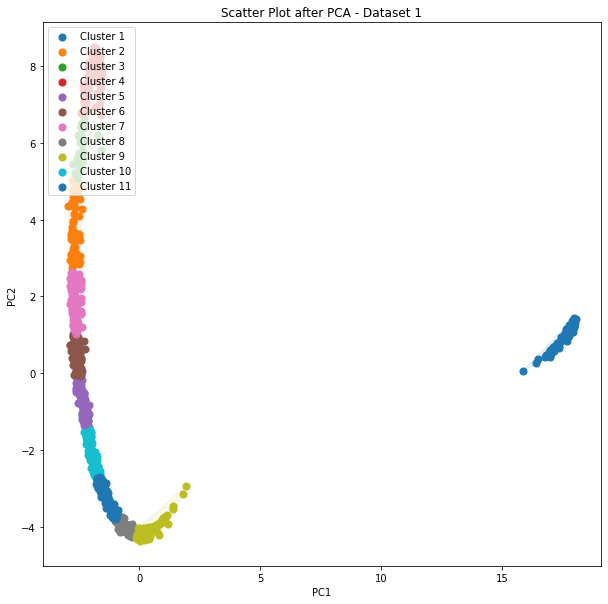

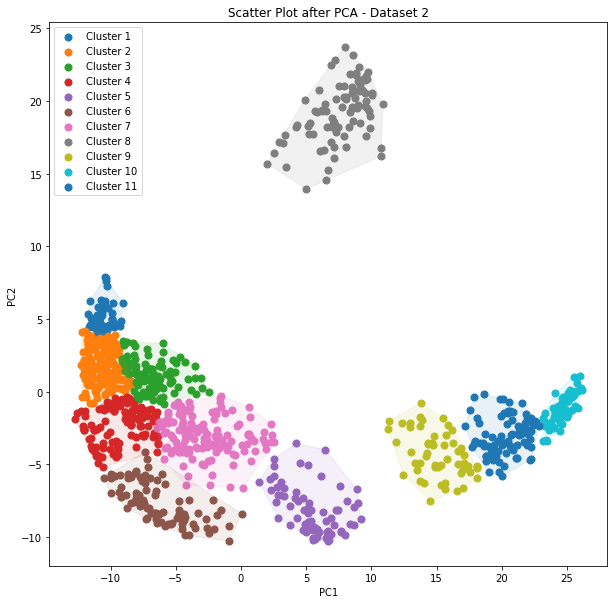

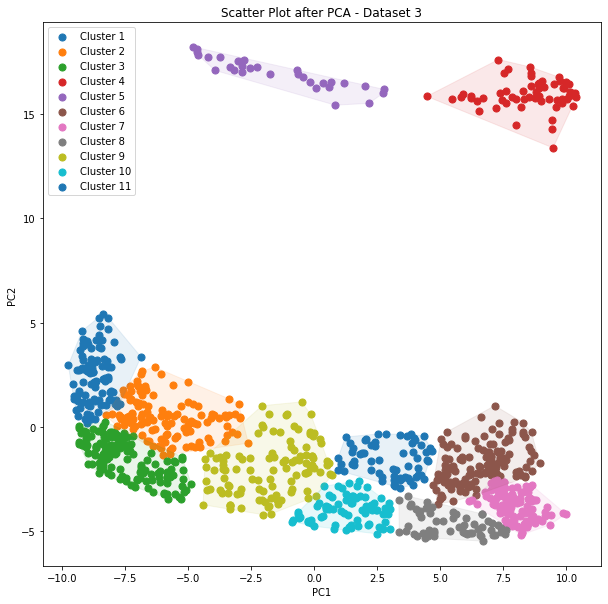

In [11]:
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
import numpy as np

def plot_clusters(df_list, num_clusters=11):
    # Create a list of unique colors for each cluster
    colors = sns.color_palette('tab10', num_clusters)

    # Create a separate scatter plot for each dataframe
    for j, df in enumerate(df_list):
        linkage_matrix = linkage(df[['PC1', 'PC2']], method='ward')
        cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
        df['cluster'] = cluster_labels
        fig, ax = plt.subplots(figsize=(10, 10))
        for i in range(num_clusters):
            ax.scatter(df.loc[df['cluster']==i+1, 'PC1'], df.loc[df['cluster']==i+1, 'PC2'], color=colors[i], s=50, label=f'Cluster {i+1}')
        ax.set_title(f'Scatter Plot after PCA - Dataset {j+1}')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.legend(loc='upper left')

    # Draw convex hulls
        for i in range(np.unique(cluster_labels).shape[0]):
            cluster_points = df.loc[cluster_labels==i+1, ['PC1', 'PC2']]
            hull = ConvexHull(cluster_points)
            ax.fill(cluster_points.iloc[hull.vertices, 0], cluster_points.iloc[hull.vertices, 1], color=colors[i], alpha=0.1)

    plt.show()


# Example usage with three dataframes df1, df2, df3:
plot_clusters([df_pca1, df_pca2, df_pca3], num_clusters=11)


In [12]:
# # Create a list of unique colors for each cluster
# colors = sns.color_palette('tab10', num_clusters)

# # Create scatter plot with PCA components and cluster labels
# plt.figure(figsize=(10, 10))
# for i in range(num_clusters):
#     plt.scatter(df_pca.loc[df_pca['cluster']==i+1, 'PC1'], df_pca.loc[df_pca['cluster']==i+1, 'PC2'], color=colors[i], s=50, label=f'Cluster {i+1}')
# plt.title('Scatter Plot after PCA')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.legend(loc='upper left')

# # Draw convex hulls
# for i in range(np.unique(cluster_labels).shape[0]):
#     cluster_points = df_pca.loc[cluster_labels==i+1, ['PC1', 'PC2']]
#     hull = ConvexHull(cluster_points)
#     plt.fill(cluster_points.iloc[hull.vertices, 0], cluster_points.iloc[hull.vertices, 1], color=colors[i], alpha=0.1)

# plt.show()

In [17]:
y_true1

0       2.0
1       1.0
2       1.0
3      11.0
4       5.0
       ... 
995     5.0
996     9.0
997     2.0
998     2.0
999     2.0
Name: Fault, Length: 1000, dtype: float64

In [18]:
df_pca1["cluster"]

0       1
1       2
2       7
3      10
4      11
       ..
995     5
996     6
997     1
998     1
999     1
Name: cluster, Length: 1000, dtype: int32

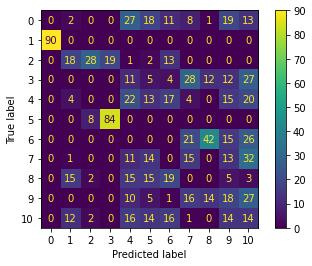

In [20]:
confusion_matrix = metrics.confusion_matrix(y_true1, df_pca1["cluster"])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [21]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true1, df_pca1["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster  1   2   3   4   5   6   7   8   9   10  11
Fault                                              
1.0       0   2   0   0  27  18  11   8   1  19  13
2.0      90   0   0   0   0   0   0   0   0   0   0
3.0       0  18  28  19   1   2  13   0   0   0   0
4.0       0   0   0   0  11   5   4  28  12  12  27
5.0       0   4   0   0  22  13  17   4   0  15  20
6.0       0   0   8  84   0   0   0   0   0   0   0
7.0       0   0   0   0   0   0   0  21  42  15  26
8.0       0   1   0   0  11  14   0  15   0  13  32
9.0       0  15   2   0  15  15  19   0   0   5   3
10.0      0   0   0   0  10   5   1  16  14  18  27
11.0      0  12   2   0  16  14  16   1   0  14  14
